# Gradient Boosting Intro

In [2]:
import numpy as np
from matplotlib import pylab as plt

## Make some artificial data

In [6]:
x = np.arange(0,60)

# also with a noise on it
y1 = x * 3 + np.random.randn(len(x)) * 2.5
y2 = x + 1 + np.random.randn(len(x)) * 1.1

y = np.where((x//10) % 2, y1, y2)

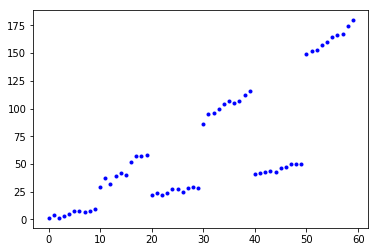

In [7]:
plt.plot(x,y, 'b.');

# Train linear model

In [10]:
from sklearn.linear_model import LinearRegression

X = x.reshape(-1,1)

lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

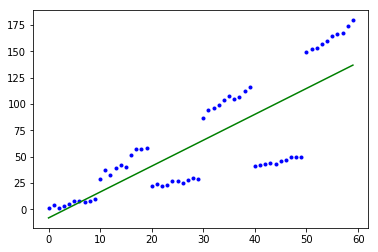

In [12]:
plt.plot(x,y, 'b.', X, lr.predict(X), 'g-');

There is only one line - but not really what it is 

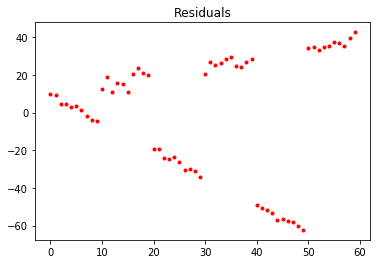

In [14]:
r = y - lr.predict(X)
plt.plot(x,r, 'r.');
plt.title('Residuals');

Residual --> systematischer Fehler - lineares Modell keine gute wahl da eigentlich zwei modelle


## Plus decision tree

In [21]:
from sklearn.tree import DecisionTreeRegressor

# Anzahl der Entscheidungen können mit max_depth verändert werden (zu hoch = Overfitting)
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X,r);

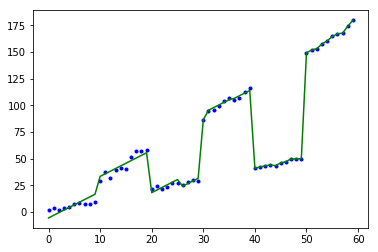

In [22]:
y_hat = lr.predict(X) + dt.predict(X)

plt.plot(x, y, 'b.', x, y_hat, 'g-');

Boosting Modell - rechne lineares Modell raus - und verbessere durch zweites modell basierend auf Anzahl der Classen die gesucht werden

## Lets use the readl Algorithm

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
gb = GradientBoostingRegressor(max_depth=1, n_estimators=1000, validation_fraction=0.2, n_iter_no_change=5)
# validation_fraction = 20% daten als validation um das Training ev. in ein overfitting hineinläuft
gb.fit(X, y);

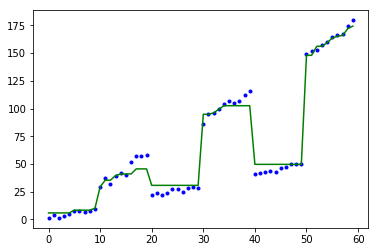

In [35]:
plt.plot(x, y, 'b.', x, gb.predict(X), 'g-');

In [27]:
# n_estimators = 100 - 100 Entscheidungsbäume, max_depth ergibt die anzahl der klassen z.b. 3
gb

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

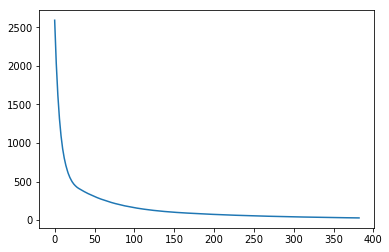

In [36]:
plt.plot(gb.train_score_);